#Loading Data


In [44]:
import tensorflow as tf

In [54]:
from tensorflow.keras.datasets import mnist
(x_train, y_train),(x_test,y_test) = mnist.load_data()

In [55]:
x_train.shape

(60000, 28, 28)

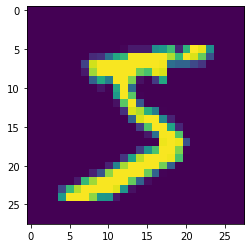

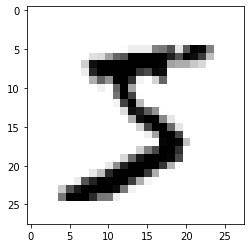

In [56]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0],cmap=plt.cm.binary)

#Normalising images by dividing images by 255

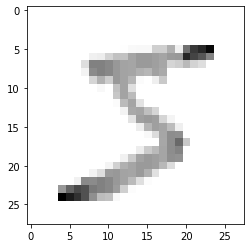

In [52]:
x_train= tf.keras.utils.normalize(x_train, axis=1)
x_test= tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [57]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [58]:
print(y_train[0])

5


#Convert labels to categories

#Build a CNN Architecture

In [59]:
import numpy as np
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_testr=np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print("Training Samples Dimension",x_trainr.shape)
print("Testing Samples Dimension",x_testr.shape)

Training Samples Dimension (60000, 28, 28, 1)
Testing Samples Dimension (10000, 28, 28, 1)


In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [62]:
model = Sequential()

model.add(Conv2D(64,(3,3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

In [63]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [64]:
print("Total training samples",len(x_trainr))

Total training samples 60000


In [67]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [68]:
model.fit(x_trainr,y_train,epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 72s 54ms/step - loss: 0.3245 - accuracy: 0.9095 - val_loss: 0.1049 - val_accuracy: 0.9688
Epoch 2/5
1313/1313 [==============================] - 78s 60ms/step - loss: 0.1036 - accuracy: 0.9697 - val_loss: 0.1099 - val_accuracy: 0.9675
Epoch 3/5
1313/1313 [==============================] - 73s 56ms/step - loss: 0.0792 - accuracy: 0.9760 - val_loss: 0.0887 - val_accuracy: 0.9743
Epoch 4/5
1313/1313 [==============================] - 62s 47ms/step - loss: 0.0644 - accuracy: 0.9801 - val_loss: 0.1027 - val_accuracy: 0.9715
Epoch 5/5
1313/1313 [==============================] - 60s 46ms/step - loss: 0.0532 - accuracy: 0.9835 - val_loss: 0.0702 - val_accuracy: 0.9794


In [69]:
test_loss,test_acc = model.evaluate(x_testr,y_test)
print("Test loss",test_loss)
print("Test Accuracy",test_acc)

313/313 [==============================] - 5s 15ms/step - loss: 0.0727 - accuracy: 0.9795
Test loss 0.07268717139959335
Test Accuracy 0.9794999957084656


In [70]:
predictions=model.predict([x_testr])

In [82]:
print(predictions)

[[2.1580186e-07 3.5562737e-06 6.6833186e-06 ... 9.9997091e-01
  1.0040132e-07 1.0228754e-06]
 [1.2147807e-04 2.4411800e-06 9.9964607e-01 ... 1.2199011e-05
  6.0614452e-06 2.6510196e-07]
 [6.5302970e-07 9.9999690e-01 2.8236398e-09 ... 2.1581489e-07
  9.8444666e-08 1.8718315e-06]
 ...
 [7.4473468e-07 5.6324700e-10 3.4542680e-10 ... 5.5336957e-09
  3.4277825e-08 3.6232004e-09]
 [1.4795158e-09 1.0565630e-07 7.1040804e-09 ... 4.3089496e-09
  7.4588393e-06 7.4561683e-07]
 [2.8662351e-05 3.0041221e-08 4.6413215e-06 ... 4.5266629e-12
  1.9426413e-06 5.5332152e-06]]


In [83]:
print(np.argmax(predictions[0]))

7


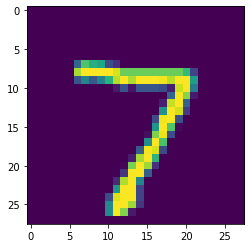

In [84]:
plt.imshow(x_test[0])

In [79]:
!pip install opencv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement opencv (from versions: none)
ERROR: No matching distribution found for opencv


In [5]:
import cv2
import matplotlib.pyplot as plt


In [6]:
img=cv2.imread('MNIST_digit.png')

In [14]:
import cv2
 
# To read image from disk, we use
# cv2.imread function, in below method,
img = cv2.imread("MNIST_digit.png", cv2.IMREAD_COLOR)
 
# Creating GUI window to display an image on screen
# first Parameter is windows title (should be in string format)
# Second Parameter is image array
cv2.imshow("image", img)

DisabledFunctionError: ignored

In [13]:

from google.colab.patches import cv2_imshow

import cv2
img = cv2.imread('MNIST_digit.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

AttributeError: ignored

In [90]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)

Path of the image to be predicted: C:\Users\Akshith\Downloads\MNIST_digit.png


NameError: ignored